In [13]:
#This session is for reading data
import gzip
from collections import defaultdict 
import json


def readJSON(path):
    f = gzip.open(path, 'rt')
    f.readline()
    for l in f:
        yield l

data_rent_the_way = []
for l in readJSON("renttherunway_final_data.json.gz"):

    data_rent_the_way.append(json.loads(l))





In [14]:
def convert_weight_from_string(s):
    numeric_part = ""
    
    for char in s:
        if char.isdigit():
            numeric_part += char
        else:
            break  # Exit the loop if a non-digit character is encountered
    
    if numeric_part:
        return int(numeric_part)
    else:
        return None  # or raise an exception, depending on your needs
    
def height_to_cm(height_str):
    # Split the input string into feet and inches
    feet, inches = map(int, height_str.replace('"', '').split("'"))

    # Convert feet and inches to centimeters
    height_cm = (feet * 30.48) + (inches * 2.54)

    return "{:.2f}".format(height_cm)

In [15]:
def convert_bra_size_to_bust_size(bra_size):
    # Example conversion factor: 1 inch = 2.54 centimeters
    inches_to_cm_conversion = 2.54
    additional_inches = 0
    if '/' in bra_size:
        bra_size = bra_size.split('/')[0]
    if(bra_size[-1] == '+'):
        bra_size = bra_size[:-1]
        additional_inches = 1

    # Extract band size and cup size from the input
    # print(bra_size)
    if('dd' in bra_size):
        band_size = int(bra_size[:2])
        cup_size = bra_size[2].upper()
    else:
        band_size =int(bra_size[:2])  # Extracts the numeric part of the bra size
        cup_size = bra_size[2].upper()  # Extracts the last character (cup size) and converts to uppercase

    # Define a dictionary to map cup sizes to additional inches
    cup_size_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'DD': 5}  # Add more cup sizes if needed

    # Use the cup size mapping to get the additional inches
    additional_inches += cup_size_mapping.get(cup_size, 0)

    # Calculate bust size in centimeters, adding band size
    bust_size_cm = (band_size + additional_inches + band_size) * inches_to_cm_conversion

    return bust_size_cm

In [16]:
convert_bra_size_to_bust_size('34ddd/e')

182.88

In [17]:
def remove_after_slash(input_string):
    if '/' in input_string:
        return input_string.split('/')[0]
    else:
        return input_string
strings = ["30A", "32B", "34C", "36D", "38DD", "34D/E+", '34D/f+']  # Replace with the actual strings

for s in strings:
    result = remove_after_slash(s)
    print(f"Original: {s}, Modified: {result}")

Original: 30A, Modified: 30A
Original: 32B, Modified: 32B
Original: 34C, Modified: 34C
Original: 36D, Modified: 36D
Original: 38DD, Modified: 38DD
Original: 34D/E+, Modified: 34D
Original: 34D/f+, Modified: 34D


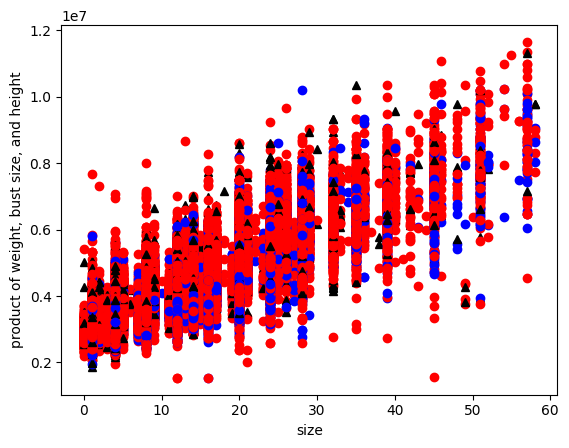

In [18]:
import matplotlib.pyplot as plt 


for d in data_rent_the_way:
    if('fit' in d and 'weight' in d and 'bust size' in d and 'height' in d and 'size' in d):
        w = float(convert_weight_from_string(d['weight']))

        bs = float(convert_bra_size_to_bust_size(d['bust size']))
        h = float(height_to_cm(d['height']))

        product = w * bs * h
        if(d['fit'] == 'fit'):
            plt.plot(d['size'], product, 'ro')
        elif(d['fit'] == 'large'):
             plt.plot(d['size'], product, 'k^')
        else:

             plt.plot(d['size'], product, 'bo')
# plt.legend()
plt.xlabel('size')
plt.ylabel('product of weight, bust size, and height')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


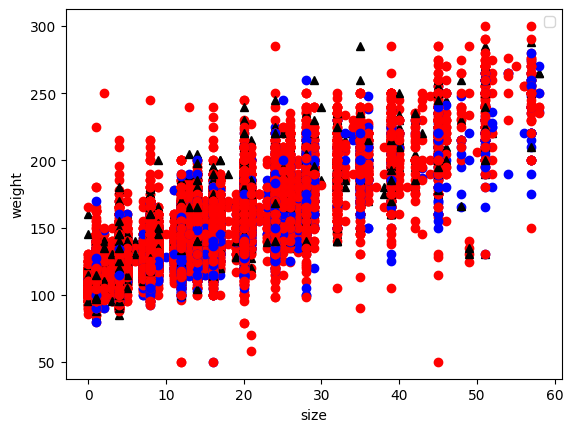

In [19]:
import matplotlib.pyplot as plt1 


for d in data_rent_the_way:
    if('fit' in d and 'weight' in d and 'bust size' in d and 'height' in d and 'size' in d):
        w = float(convert_weight_from_string(d['weight']))
        

        product = w
        if(d['fit'] == 'fit'):
            plt1.plot(d['size'], product, 'ro')
        elif(d['fit'] == 'large'):
            plt1.plot(d['size'], product, 'k^')
        else:
            plt1.plot(d['size'], product, 'bo')
plt1.legend() 
plt1.xlabel('size')
plt1.ylabel('weight')
plt1.show()

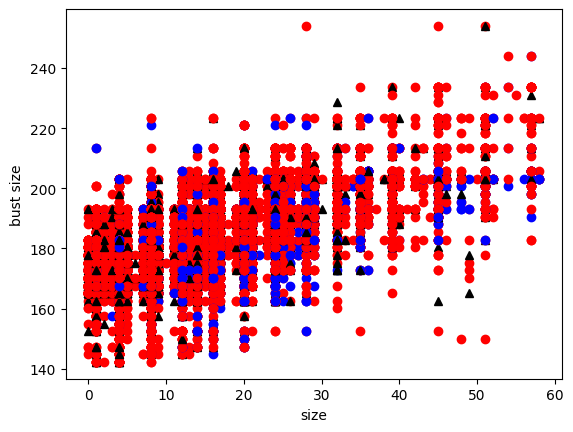

In [22]:
import matplotlib.pyplot as plt2


for d in data_rent_the_way:
    if('fit' in d and 'weight' in d and 'bust size' in d and 'height' in d and 'size' in d):
        # w = float(convert_weight_from_string(d['weight']))
        # print(d['bust size'])
        bs = float(convert_bra_size_to_bust_size(d['bust size']))
        # h = float(height_to_cm(d['height']))


        product = bs
        if(d['fit'] == 'fit'):
            plt2.plot(d['size'], product, 'ro')
        elif(d['fit'] == 'large'):
             plt2.plot(d['size'], product, 'k^')
        else:

             plt2.plot(d['size'], product, 'bo')

plt2.xlabel('size')
plt2.ylabel('bust size')
plt2.show()

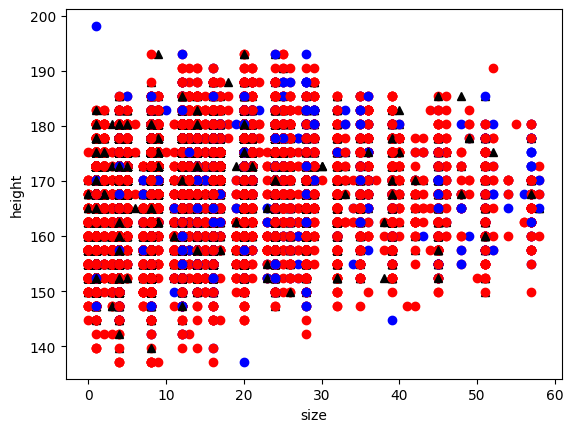

In [23]:
import matplotlib.pyplot as plt3

for d in data_rent_the_way:
    if('fit' in d and 'weight' in d and 'bust size' in d and 'height' in d and 'size' in d):
        # w = float(convert_weight_from_string(d['weight']))
        # print(d['bust size'])
        # bs = float(convert_bra_size_to_bust_size(d['bust size']))
        h = float(height_to_cm(d['height']))
        # print(h)
        # print(bs)
        # print(w)

        product = h
        if(d['fit'] == 'fit'):
            plt3.plot(d['size'], product, 'ro')
        elif(d['fit'] == 'large'):
            plt3.plot(d['size'], product, 'k^')
        else:

            plt3.plot(d['size'], product, 'bo')
    
plt3.xlabel('size')
plt3.ylabel('height')
plt3.show()

In [ ]:
import matplotlib.pyplot as plt
small_percent = []
x = []

for i in category_fit_count:
    one_small_percent = category_fit_count[i][0]
    small_percent.append(one_small_percent)
    x.append(i)

small_percent = np.array(small_percent)
x = np.array(x)
sort_small = np.argsort(small_percent)
# print(small_percent[sort_small])

y_axis = small_percent[sort_small]
x_axis = x[sort_small]

plt.bar(x_axis, y_axis)

plt.xlabel('catagory')
plt.ylabel('percent of catagory fit small')
plt.title('percent of catagory (0 - 1) that fit small ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=0.00001, w_pad= 000000.1)
plt.show()


fit_percent = []
x = []

for i in category_fit_count:
    one_fit_percent = category_fit_count[i][1]
    fit_percent.append(one_fit_percent)
    x.append(i)

fit_percent = np.array(fit_percent)
x = np.array(x)
sort_fit = np.argsort(fit_percent)
# print(small_percent[sort_small])

y_axis = fit_percent[sort_fit]
x_axis = x[sort_fit]

plt.bar(x_axis, y_axis)

plt.xlabel('catagory')
plt.ylabel('percent of catagory fit')
plt.title('percent of catagory (0 - 1) that fit ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=0.00001, w_pad= 000000.1)
plt.show()


large_percent = []
x = []

for i in category_fit_count:
    one_fit_percent = category_fit_count[i][2]
    large_percent.append(one_fit_percent)
    x.append(i)

large_percent = np.array(large_percent)
x = np.array(x)
sort_fit_large = np.argsort(large_percent)
# print(small_percent[sort_small])

y_axis = large_percent[sort_fit_large]
x_axis = x[sort_fit_large]

plt.bar(x_axis, y_axis)

plt.xlabel('catagory')
plt.ylabel('percent of catagory fit large')
plt.title('percent of catagory (0 - 1) that fit large')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=0.00001, w_pad= 000000.1)
plt.show()

    

In [33]:
#correlation between fit percentage and users
import numpy as np

def get_one_feature_fit_percentage(category):
    
    fea_count = defaultdict(lambda: np.array([0, 0, 0],dtype=float))
    fit_index = {"small":0, "fit":1,"large":2}
    count_tatal_present = defaultdict(int)
    for d in data_rent_the_way:
        if(category in d and 'fit' in d):
            one_cat = d[category]
            fea_count[one_cat][fit_index[d['fit']]] += 1
            count_tatal_present[one_cat] += 1

    for d in fea_count:
        for i in range(3):
            fea_count[d][i] /= count_tatal_present[d]
    
    return fea_count

In [37]:
import statistics
def get_variance(count_dict):
    small = []
    fit = []
    large = []
    for d in count_dict:
        arr = count_dict[d]
        small.append(arr[0])
        fit.append(arr[1])
        large.append(arr[2])
    return (statistics.variance(small) + statistics.variance(fit) + statistics.variance(large)) / 3


In [40]:
rent_for_fea_arr = get_one_feature_fit_percentage("rented for")
print(rent_for_fea_arr)
get_variance(rent_for_fea_arr)

defaultdict(<function get_one_feature_fit_percentage.<locals>.<lambda> at 0x7f77b647cd30>, {'other': array([0.13101118, 0.73654796, 0.13244086]), 'party': array([0.14612923, 0.72626733, 0.12760344]), 'formal affair': array([0.12047119, 0.76937735, 0.11015146]), 'wedding': array([0.14663229, 0.74607158, 0.10729614]), 'date': array([0.16134272, 0.7121007 , 0.12655658]), 'everyday': array([0.09814529, 0.69004875, 0.21180597]), 'vacation': array([0.12076583, 0.71502209, 0.16421208]), 'work': array([0.12504986, 0.72177902, 0.15317112]), 'party: cocktail': array([0., 1., 0.])})


0.004762054476467751

In [41]:
cat_fea = get_one_feature_fit_percentage("category")
get_variance(cat_fea)

0.032335110592144944

In [42]:
rate_count = get_one_feature_fit_percentage("rating")
get_variance(rate_count)

0.025825445598840122

In [43]:
user_count = get_one_feature_fit_percentage("user_id") 
get_variance(user_count)

0.10945698757858863

In [50]:
print(len(user_count))

105571


In [44]:
weight_count = get_one_feature_fit_percentage("weight")
get_variance(weight_count)


0.02036486552654149

In [45]:
btype_count = get_one_feature_fit_percentage("body type")
get_variance(btype_count)

0.00010417168686202078

In [46]:
size_count = get_one_feature_fit_percentage("size")
get_variance(size_count)

0.009347667197948526

In [47]:
age_count = get_one_feature_fit_percentage("age")
get_variance(age_count)

0.016891512443223594

In [48]:
item_count = get_one_feature_fit_percentage("item_id")
get_variance(item_count)

0.04918481229179359